In [1]:
import sys
sys.path.insert(1, './env')
sys.path.insert(1, './agents')

import gym
import pylab
import random
import strategy_imitation, sarsa, ddqn, random_agent, a2c
import aa_gun
import numpy as np
from collections import deque
import keras
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#массовый тест моделей

_____ random 0
episode: 0   score: 0.1875   memory length: 0   epsilon: 1
hit
episode: 1   score: 1.1875   memory length: 0   epsilon: 1
episode: 2   score: 0.6875   memory length: 0   epsilon: 1
episode: 3   score: 1.25   memory length: 0   epsilon: 1
episode: 4   score: 0   memory length: 0   epsilon: 1
hit
episode: 5   score: 1.8125   memory length: 0   epsilon: 1
episode: 6   score: 1.75   memory length: 0   epsilon: 1
hit
episode: 7   score: 1.375   memory length: 0   epsilon: 1
episode: 8   score: 1.3125   memory length: 0   epsilon: 1
episode: 9   score: 2.125   memory length: 0   epsilon: 1
hit
episode: 10   score: 1.1875   memory length: 0   epsilon: 1
episode: 11   score: 0.5625   memory length: 0   epsilon: 1
episode: 12   score: 0.625   memory length: 0   epsilon: 1
episode: 13   score: 0.125   memory length: 0   epsilon: 1
episode: 14   score: 1.375   memory length: 0   epsilon: 1
hit
episode: 15   score: 3.25   memory length: 0   epsilon: 1
episode: 16   score: 1.0625   m

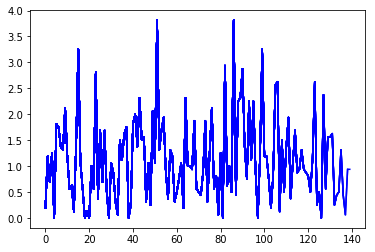

_____ random 1
episode: 0   score: 0.625   memory length: 0   epsilon: 1
episode: 1   score: 1.125   memory length: 0   epsilon: 1
episode: 2   score: 0   memory length: 0   epsilon: 1
hit
episode: 3   score: 1.5625   memory length: 0   epsilon: 1
episode: 4   score: 0.5625   memory length: 0   epsilon: 1
hit
episode: 5   score: 1.1875   memory length: 0   epsilon: 1
episode: 6   score: 0.8125   memory length: 0   epsilon: 1
hit
episode: 7   score: 2.1875   memory length: 0   epsilon: 1
hit
episode: 8   score: 1.5   memory length: 0   epsilon: 1
hit
episode: 9   score: 1.125   memory length: 0   epsilon: 1
episode: 10   score: 0.1875   memory length: 0   epsilon: 1
hit
episode: 11   score: 1.3125   memory length: 0   epsilon: 1
hit
episode: 12   score: 1.25   memory length: 0   epsilon: 1
hit
hit
episode: 13   score: 2.875   memory length: 0   epsilon: 1
episode: 14   score: 0.3125   memory length: 0   epsilon: 1
episode: 15   score: 0.5   memory length: 0   epsilon: 1
episode: 16   sc

episode: 134   score: 0.625   memory length: 0   epsilon: 1
hit
episode: 135   score: 1.3125   memory length: 0   epsilon: 1
episode: 136   score: 0.25   memory length: 0   epsilon: 1
episode: 137   score: 1.3125   memory length: 0   epsilon: 1
episode: 138   score: 1.3125   memory length: 0   epsilon: 1
hit
episode: 139   score: 1.3125   memory length: 0   epsilon: 1


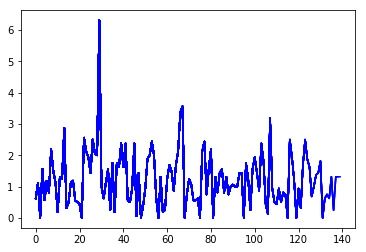

_____ random 2
episode: 0   score: 0.3125   memory length: 0   epsilon: 1
episode: 1   score: 0.1875   memory length: 0   epsilon: 1
episode: 2   score: 1.3125   memory length: 0   epsilon: 1
episode: 3   score: 0.8125   memory length: 0   epsilon: 1
episode: 4   score: 0.875   memory length: 0   epsilon: 1
episode: 5   score: 0.0625   memory length: 0   epsilon: 1
hit
hit
episode: 6   score: 2.125   memory length: 0   epsilon: 1
episode: 7   score: 0.5   memory length: 0   epsilon: 1
episode: 8   score: 0.5625   memory length: 0   epsilon: 1
episode: 9   score: 0.375   memory length: 0   epsilon: 1
episode: 10   score: 0.625   memory length: 0   epsilon: 1
episode: 11   score: 0.375   memory length: 0   epsilon: 1
episode: 12   score: 0.1875   memory length: 0   epsilon: 1
episode: 13   score: 1.4375   memory length: 0   epsilon: 1
episode: 14   score: 0.9375   memory length: 0   epsilon: 1
episode: 15   score: 1.625   memory length: 0   epsilon: 1
episode: 16   score: 0.75   memory l

episode: 137   score: 0.3125   memory length: 0   epsilon: 1
hit
episode: 138   score: 1.625   memory length: 0   epsilon: 1
episode: 139   score: 0.375   memory length: 0   epsilon: 1


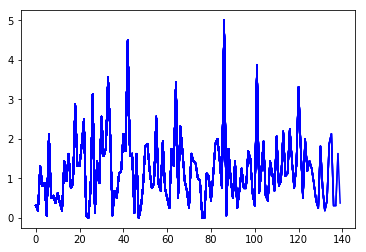

_____ random 3
episode: 0   score: 0   memory length: 0   epsilon: 1
episode: 1   score: 0.1875   memory length: 0   epsilon: 1
episode: 2   score: 0.8125   memory length: 0   epsilon: 1
hit
episode: 3   score: 1.1875   memory length: 0   epsilon: 1
hit
episode: 4   score: 2.5625   memory length: 0   epsilon: 1
episode: 5   score: 1.0   memory length: 0   epsilon: 1
episode: 6   score: 0.3125   memory length: 0   epsilon: 1
episode: 7   score: 1.0   memory length: 0   epsilon: 1
hit
episode: 8   score: 1.8125   memory length: 0   epsilon: 1
episode: 9   score: 0.375   memory length: 0   epsilon: 1
episode: 10   score: 0.9375   memory length: 0   epsilon: 1
episode: 11   score: 0.6875   memory length: 0   epsilon: 1
episode: 12   score: 0.9375   memory length: 0   epsilon: 1
episode: 13   score: 0.1875   memory length: 0   epsilon: 1
episode: 14   score: 0   memory length: 0   epsilon: 1
hit
episode: 15   score: 2.4375   memory length: 0   epsilon: 1
episode: 16   score: 1.1875   memory

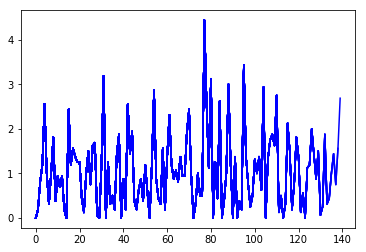

_____ random 4
episode: 0   score: 1.0   memory length: 0   epsilon: 1
episode: 1   score: 0.5625   memory length: 0   epsilon: 1
hit
episode: 2   score: 1.25   memory length: 0   epsilon: 1
hit
episode: 3   score: 3.4375   memory length: 0   epsilon: 1
episode: 4   score: 0   memory length: 0   epsilon: 1
episode: 5   score: 1.0   memory length: 0   epsilon: 1
hit
episode: 6   score: 1.5625   memory length: 0   epsilon: 1
episode: 7   score: 0.8125   memory length: 0   epsilon: 1
episode: 8   score: 0.8125   memory length: 0   epsilon: 1
episode: 9   score: 0.3125   memory length: 0   epsilon: 1
episode: 10   score: 0.0625   memory length: 0   epsilon: 1
hit
hit
hit
hit
episode: 11   score: 5.0   memory length: 0   epsilon: 1
episode: 12   score: 0.375   memory length: 0   epsilon: 1
hit
episode: 13   score: 1.875   memory length: 0   epsilon: 1
episode: 14   score: 0.25   memory length: 0   epsilon: 1
episode: 15   score: 1.125   memory length: 0   epsilon: 1
hit
episode: 16   score:

episode: 137   score: 1.0   memory length: 0   epsilon: 1
episode: 138   score: 0.6875   memory length: 0   epsilon: 1
hit
episode: 139   score: 2.0   memory length: 0   epsilon: 1


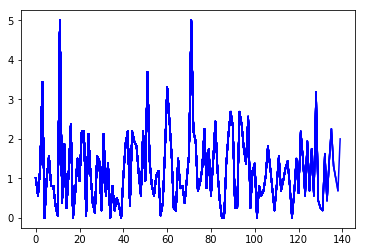

_____ ddqn 0



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 175       
Total params: 1,087
Trainable params: 1,087
Non-trainable params: 0
_________________________________________________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_5 (Dense)              (None, 24)                600       
_________________________________________________________

episode: 68   score: 0.625   memory length: 2000   epsilon: 0.009998671593271896
episode: 69   score: 0.5625   memory length: 2000   epsilon: 0.009998671593271896
hit
episode: 70   score: 1.4375   memory length: 2000   epsilon: 0.009998671593271896
episode: 71   score: 0.5625   memory length: 2000   epsilon: 0.009998671593271896
episode: 72   score: 0.125   memory length: 2000   epsilon: 0.009998671593271896
episode: 73   score: 0.3125   memory length: 2000   epsilon: 0.009998671593271896
episode: 74   score: 0.625   memory length: 2000   epsilon: 0.009998671593271896
hit
episode: 75   score: 1.25   memory length: 2000   epsilon: 0.009998671593271896
hit
episode: 76   score: 1   memory length: 2000   epsilon: 0.009998671593271896
episode: 77   score: 0.875   memory length: 2000   epsilon: 0.009998671593271896
episode: 78   score: 0.125   memory length: 2000   epsilon: 0.009998671593271896
hit
episode: 79   score: 1.0625   memory length: 2000   epsilon: 0.009998671593271896
hit
hit
epis

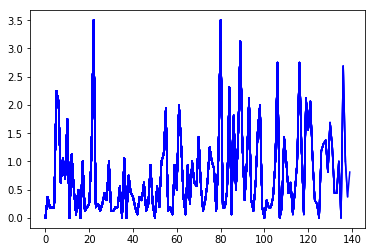

_____ ddqn 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_8 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 175       
Total params: 1,087
Trainable params: 1,087
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_11 (Dense)             (None, 24)                600       
_____________________________________________________________

hit
episode: 83   score: 2.0625   memory length: 2000   epsilon: 0.009998671593271896
episode: 84   score: 0.0625   memory length: 2000   epsilon: 0.009998671593271896
episode: 85   score: 0.3125   memory length: 2000   epsilon: 0.009998671593271896
episode: 86   score: 0.375   memory length: 2000   epsilon: 0.009998671593271896
episode: 87   score: 0.125   memory length: 2000   epsilon: 0.009998671593271896
episode: 88   score: 0   memory length: 2000   epsilon: 0.009998671593271896
episode: 89   score: 0   memory length: 2000   epsilon: 0.009998671593271896
episode: 90   score: 0.375   memory length: 2000   epsilon: 0.009998671593271896
episode: 91   score: 0   memory length: 2000   epsilon: 0.009998671593271896
hit
episode: 92   score: 2.125   memory length: 2000   epsilon: 0.009998671593271896
episode: 93   score: 0   memory length: 2000   epsilon: 0.009998671593271896
episode: 94   score: 0   memory length: 2000   epsilon: 0.009998671593271896
episode: 95   score: 0   memory lengt

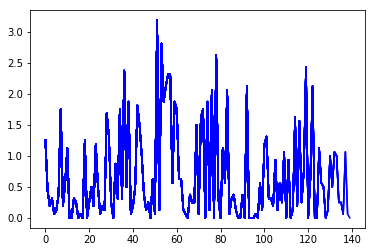

_____ ddqn 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_14 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 175       
Total params: 1,087
Trainable params: 1,087
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_17 (Dense)             (None, 24)                600       
_____________________________________________________________

KeyboardInterrupt: 

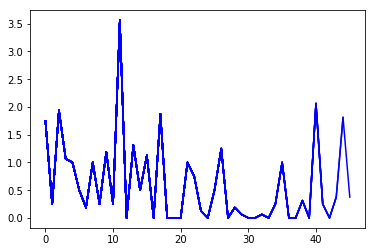

In [3]:
#Проверь на зенитке, на cartpole и на mountain car

score_dict_full={'random':[],'ddqn':[],'a2c':[],'sarsa':[]}
border_med = 100
EPISODES=140
score_dict_med={'random':[],'ddqn':[],'a2c':[],'sarsa':[]}#c border_med по... такты. Надо, чтобы проверить быстроту обучения

agent_list=[random_agent.randomAgent,a2c.A2CAgent,ddqn.DoubleDQNAgent,sarsa.SarsaAgent]
for ag_num in range(4):
    if ag_num==0:
        name='random'
    if ag_num==1:
        name='a2c'
    if ag_num==2:
        name='ddqn' 
    if ag_num==3:
        name='sarsa'
    
    for estimation in range(5):
        print('_____',name,estimation)
        #здесь весь код от инициализации модели до выдачи scores. Но без рендера.
        # In case of CartPole-v1, maximum length of episode is 500
        
        env = aa_gun.AA_gun_simple0_env()
        #env = gym.make('MountainCar-v0')
        
        #env=CartPoleEnv9()
        # get size of state and action from environment
        state_size = env.observation_space.shape[0]
        action_size = env.action_space.n

        #agent = DoubleDQNAgent(state_size, action_size)
        agent = agent_list[ag_num](state_size, action_size)
        agent.train_start=100
        agent.render=True

        scores, episodes = [], []
        reward_lst = []
        s_list=[]
        a_list=[]

        for e in range(EPISODES):
            done = False
            score = 0
            state = env.reset()
            state = np.reshape(state, [1, state_size])

            while not done:
                #if (e in range(2,7)) or (e in range(20,25)) or (e in range(100,103)) or (e in range(200,202)) or (e in range(300,306)) or (e in range(400,406)) or (e in range(500,506)) or (e in range(600,604)):
                #    if agent.render:
                #        env.render()

                # get action for the current state and go one step in environment
                action = agent.get_action(state)
                next_state, reward, done, info = env.step(action)
                next_state = np.reshape(next_state, [1, state_size])
                # if an action make the episode end, then gives penalty of -100

                
                # save the sample <s, a, r, s'> to the replay memory
                agent.append_sample(state, action, reward, next_state, done)
                #if next_state[0,11]!=reward:
                #    print('state[13]!=reward',state[0,11],reward)
                #
                s_list.append(state)
                a_list.append(action)
                reward_lst.append(reward)
                #

                # every time step do the training
                agent.train_model()
                score += reward
                state = next_state

                if done:
                    # every episode update the target model to be same with model
                    agent.update_target_model()

                    # every episode, plot the play time
                    scores.append(score)
                    episodes.append(e)
                    pylab.plot(episodes, scores, 'b')
                    #pylab.savefig("./save_graph/aa_gun_dqn.png")
                    print("episode:", e, "  score:", score, "  memory length:",
                          len(agent.memory), "  epsilon:", agent.epsilon)



            # save the model
            #if e % 50 == 0:
            #    agent.model.save_weights("./save_model/aa_gun_dqn.h5")



        #и первые 3000 тактов - это рандом
        #Ходов так 50
        score_dict_full[name].append(np.mean(scores))
        score_dict_med[name].append(np.mean(scores[border_med:]))
        import pickle
        f=open('score_dict.pkl','wb')
        pickle.dump([score_dict_full,score_dict_med],f)
        plt.show()